In [61]:
# import lybrary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [73]:
# make variable
os.chdir('D:/Karir/Iykra Fellowship/task/week 3/Statistics in DS')
dc_insurance = pd.read_excel('data_dict_insurance.xlsx')
insurance = pd.read_csv('insurance.csv')

# 1. 
Perform basic exploratory data analysis which should include the following and print out your insights at every step:

A. The Shape of the data

In [17]:
# shape data
print(insurance.shape)
print(f"""The insurance has {insurance.shape[0]} rows and has {insurance.shape[1]} columns""")

(1338, 7)
The insurance has 1338 rows and has 7 columns


B. The Data type of each attribute

In [18]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C. Checking the presence of missing values

In [19]:
print("There is no missing values in each columns")
insurance.isnull().sum()

There is no missing values in each columns


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


D. 5 points summary of numerical attributes

In [22]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


E. Distribution of 'bmi', 'age', 'charges' columns

In [23]:
# Distribution plot


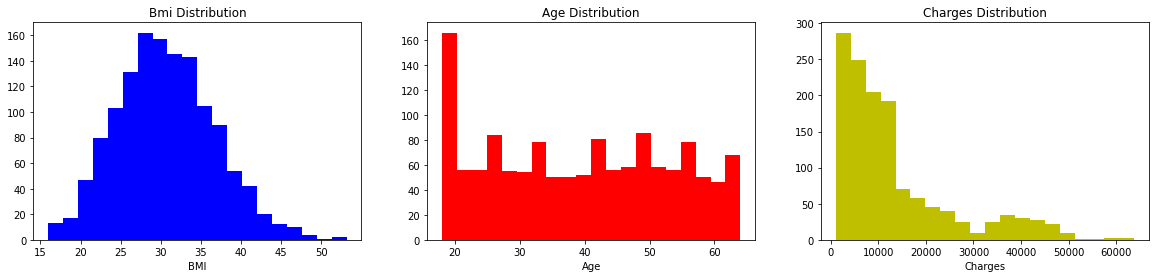

In [52]:
bmi = insurance['bmi']
age = insurance['age']
charges = insurance['charges']
fig, ax = plt.subplots(ncols = 3, figsize = (20, 4))
ax[0].hist(bmi,color = 'b',bins = 20)
ax[1].hist(age,color = 'r', bins = 20)
ax[2].hist(charges,color = 'y',bins = 20)
ax[0].set_title('Bmi Distribution')
ax[1].set_title('Age Distribution')
ax[2].set_title('Charges Distribution')
ax[0].set_xlabel('BMI')
ax[1].set_xlabel('Age')
ax[2].set_xlabel('Charges')

plt.show()

F. The measure of skewness 'bmi', 'age', 'charges' columns

In [25]:
age_bmi_charges = insurance[['age','bmi','charges']]

score skewness bmi: 0.28372857291709386
score skewness age: 0.055610083072599126
score skewness charges: 1.5141797118745743


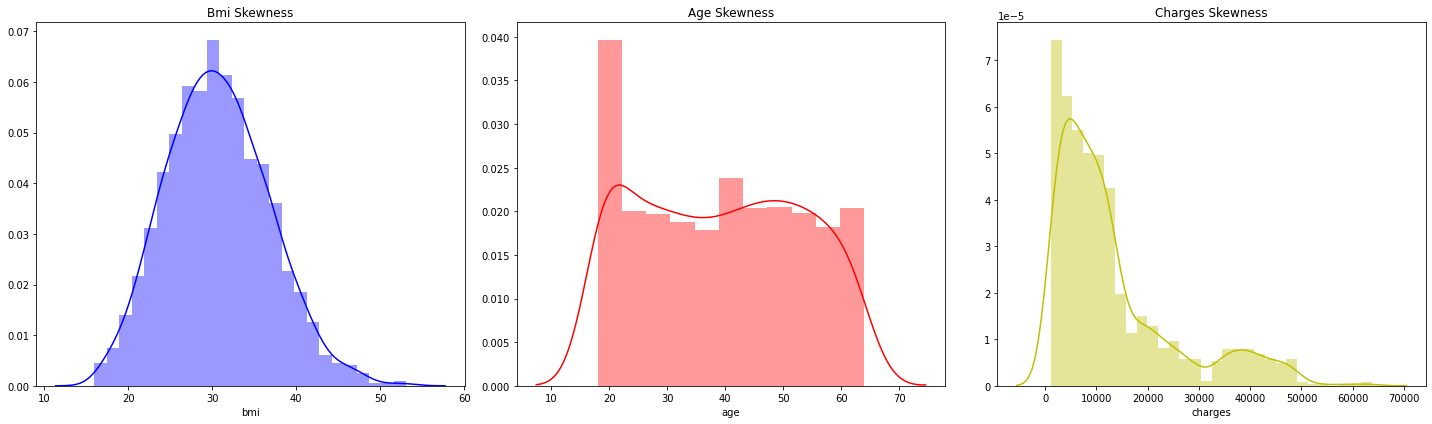

In [51]:
f, axes = plt.subplots(1,3, figsize = (20, 6))
#sns.despine(left=True)
sns.distplot(insurance['bmi'], color = 'b',ax = axes[0])
sns.distplot(insurance['age'], color = 'r', ax = axes[1])
sns.distplot(insurance['charges'], color = 'y',ax = axes[2])
#plt.setp(axes, yticks=[])
axes[0].set_title('Bmi Skewness')
axes[1].set_title('Age Skewness')
axes[2].set_title('Charges Skewness')
plt.tight_layout()
print(f"score skewness bmi: {skew(insurance['bmi'])}")
print(f"score skewness age: {skew(insurance['age'])}")
print(f"score skewness charges: {skew(insurance['charges'])}")

In [27]:
insurance[['age','bmi','charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


G. Checking the presence of outliers in 'bmi', 'age', 'charges' columns

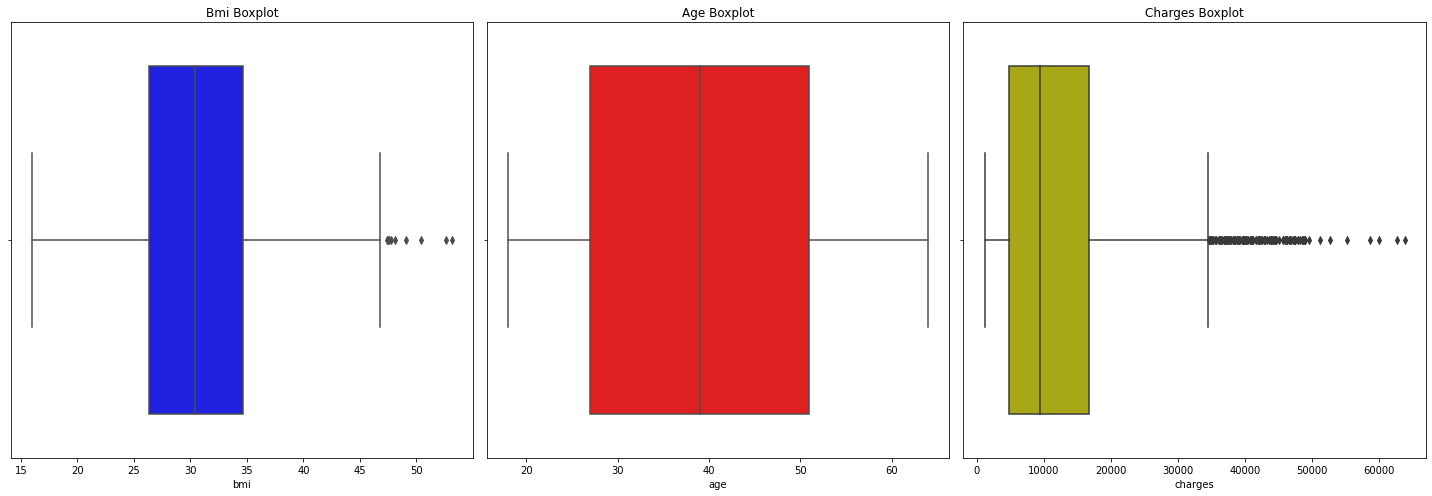

In [103]:
f, axes = plt.subplots(1,3, figsize = (20, 7))
#sns.despine(left=True)
sns.boxplot(insurance['bmi'], color = 'b',ax = axes[0])
sns.boxplot(insurance['age'], color = 'r', ax = axes[1])
sns.boxplot(insurance['charges'], color = 'y',ax = axes[2])
axes[0].set_title('Bmi Boxplot')
axes[1].set_title('Age Boxplot')
axes[2].set_title('Charges Boxplot')
#plt.setp(axes, yticks=[])
plt.tight_layout()

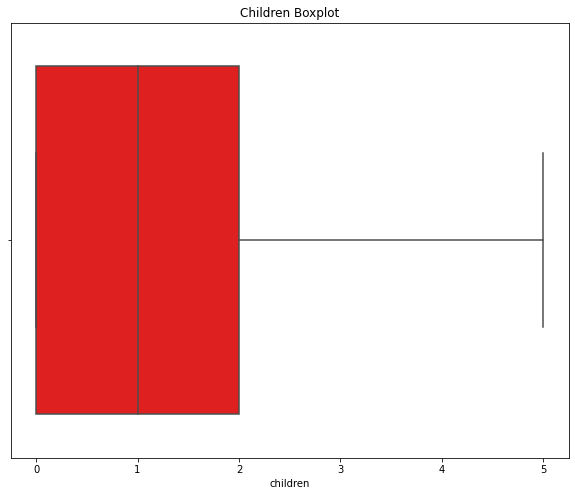

In [107]:
f, axes = plt.subplots(figsize = (10, 8))
sns.boxplot(insurance['children'], color = 'r')
axes.set_title('Children Boxplot')
plt.show()

In [84]:
#finding data sets
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [85]:
print(f"""The total outliers in column 'bmi' are: {len(detect_outlier(insurance['bmi']))}, 
      \nthis the outliers: {detect_outlier(insurance['bmi'])} \n""")
print(f"""The total outliers in column 'age' are: {len(detect_outlier(insurance['age']))}, 
      \nthis the outliers: {detect_outlier(insurance['age'])} \n""")
print(f"""The total outliers in column 'charges' are: {len(detect_outlier(insurance['charges']))}, 
      \n this the outliers: {detect_outlier(insurance['charges'])}""")

The total outliers in column 'bmi' are: 4, 
      
this the outliers: [49.06, 50.38, 52.58, 53.13, 49.06, 50.38, 52.58, 53.13] 

The total outliers in column 'age' are: 8, 
      
this the outliers: [49.06, 50.38, 52.58, 53.13, 49.06, 50.38, 52.58, 53.13] 

The total outliers in column 'charges' are: 15, 
      
 this the outliers: [49.06, 50.38, 52.58, 53.13, 49.06, 50.38, 52.58, 53.13, 51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309, 51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


# 2. 
Answer the Following question with statistical evidence

A. Do charges of people who smoke differ significantly from the people who don't?(Hypothesis Testing)

In [29]:
smoke = insurance[['smoker','charges']]
yes = smoke.loc[smoke['smoker'] == 'yes']
no = smoke.loc[smoke['smoker'] == 'no']

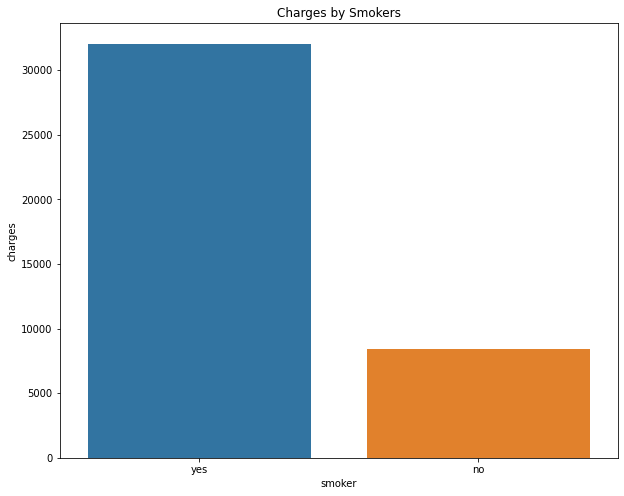

In [110]:
f, axes = plt.subplots(figsize = (10, 8))
sns.barplot(smoke['smoker'],smoke['charges'], ci = None)
axes.set_title('Charges by Smokers')
plt.show()

In [34]:
# significan levelnya 5%
t_test, pval = stats.ttest_ind(yes['charges'], no['charges'])
print('t_test:', t_test)
print('p-value:', pval)

t_test: 46.664921172723716
p-value: 8.271435842177219e-283


In [12]:
from decimal import *
Decimal(pval)

Decimal('8.27143584217721865231911251662481618616362682178386352558259237469693542517187698335975383726254700410532344026735713294555091815163249794964997600731605712407253725663566279554991666092414838409024040834695141498522897962368465392357114676043597077271526632324427396956483100652264261642554109055641709533906930944022937806281665024583672841582246792906023330530217358220397494842921003119114613530015126018998693682855522331801732184828134978288961504339916073799878815118659125343610732758896891846682556523204149774280344835452975926712463190927394936791327254440422787125374652318292337007569594974573164729349609067624214417225708703044474853586430902751085972486599917630201161955483257770538330078125E-283')

In [47]:
a = 0.05
if pval <= a :
    print('Based on t-test analysis, there are significant differences between smoker and non-smoker on paying insurance charges.')
else:
    print('Based on t-test analysis, there are no significant differences between smoker and non-smoker on paying insurance charges ')

Based on t-test analysis, there are significant differences between smoker and non-smoker on paying insurance charges.
